# Basic of the API

In [5]:
%%HTML
<p>Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow).</p>

<ol>
<li>Choose a class of model by importing the appropriate estimator class from Scikit-Learn.</li>
<li>Choose model hyperparameters by instantiating this class with desired values.</li>
<li>Arrange data into a features matrix and target vector following the discussion above.</li>
<li>Fit the model to your data by calling the fit() method of the model instance.</li>
<li>Apply the Model to new data:</li>
<ul>
<li>For supervised learning, often we predict labels for unknown data using the predict() method.</li>
<li>For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.</li>
</ul>

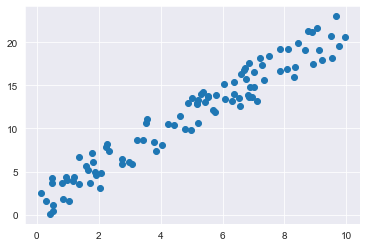

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
np.random.seed(101)

N = 100
X = np.random.rand(N) * 10
y = 2 * X - 1 + np.random.rand(N) * 5
plt.scatter(X, y)


In [9]:
%%HTML
<h2>Choosing Model Hyperparameters</h2>
<ul>
<li>Would we like to fit for the offset (i.e., y-intercept)?</li>
<li>Would we like the model to be normalized?</li>
<li>Would we like to preprocess our features to add model flexibility?</li>
<li>What degree of regularization would we like to use in our</li> model?</li>
<li>How many model components would we like to use?</li>
</ul>

In [10]:
from sklearn.linear_model import LinearRegression
LinearRegression?

In [13]:
model = LinearRegression()
model.fit(X.reshape((-1,1)), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
model.coef_

array([2.0176129])

In [15]:
model.intercept_

1.5621997841334352

In [20]:
data = np.linspace(0, 10, 100)
y_pred = model.predict(data[:, np.newaxis])

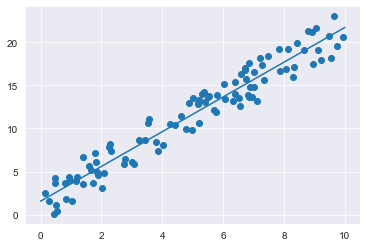

In [21]:
plt.scatter(X.reshape((-1,1)), y)
plt.plot(data, y_pred)

## Iris: Classification

In [24]:
from sklearn.model_selection import train_test_split
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [28]:
from sklearn.naive_bayes import GaussianNB
X, y = iris.iloc[:, :-1], iris['species']
model = GaussianNB()
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = .8, test_size = .2, random_state = 6)

In [29]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9333333333333333

## Iris: Dimesionaltity

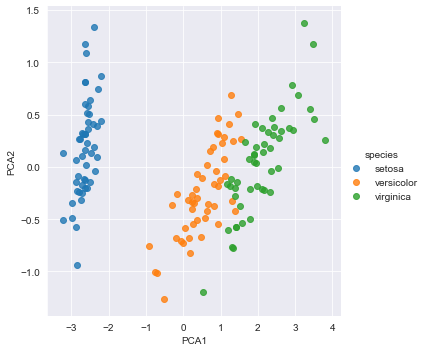

In [35]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
X1 = model.fit_transform(X)
iris['PCA1'] = X1[:, 0]
iris['PCA2'] = X1[:, 1]
sns.lmplot(data = iris, x = 'PCA1', y = 'PCA2', hue = 'species', fit_reg=False)

## Iris: Clustering

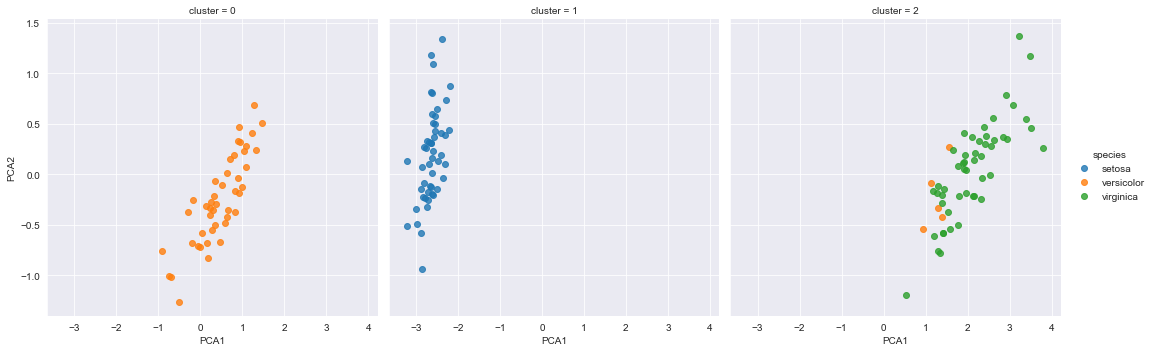

In [39]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3)
model.fit(X)
iris['cluster'] = model.predict(X)
sns.lmplot(data = iris, x = 'PCA1', y = 'PCA2', col = 'cluster', hue = 'species', fit_reg = False)

## Exploring Digits Data

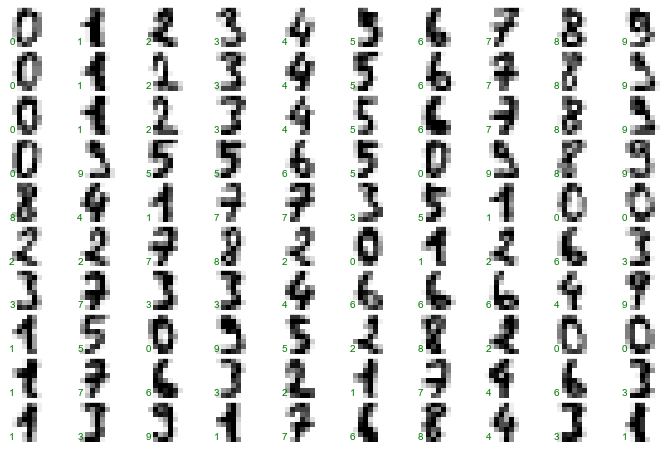

In [44]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(10, 10, subplot_kw = {'xticks': [], 'yticks' : []}, gridspec_kw = {'hspace' : .1, 'wspace' : .2}, figsize = (12,8))
sample = digits.images[:100]
sample_target = digits.target[:100]
for ax, img, label in zip(axes.flat, sample, sample_target):
    ax.imshow(img, cmap = 'binary', interpolation = 'nearest')
    ax.text(.05, .05, str(label), transform = ax.transAxes, color = 'green')


## Unspervised Learning: Dimesionality Reduction on Digits Dataset

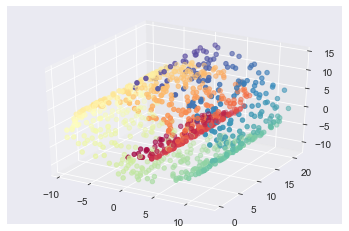

In [59]:
from sklearn.manifold import Isomap
from sklearn.datasets import make_swiss_roll
from mpl_toolkits import mplot3d
data, colors = make_swiss_roll(n_samples=1000, noise = .05)
ax = plt.axes(projection = '3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c = colors, cmap = 'Spectral')

C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


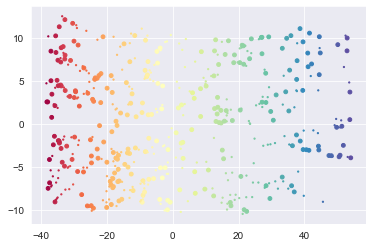

In [63]:
model = Isomap(n_components=2, n_neighbors=8)
data1 = model.fit_transform(data)
ax = plt.subplot()
ax.scatter(data1[:,0], data1[:,1], data1[:2], c = colors, cmap = 'Spectral')


## Digits: classification

In [64]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size = .8, test_size = .2, random_state = 2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8472222222222222

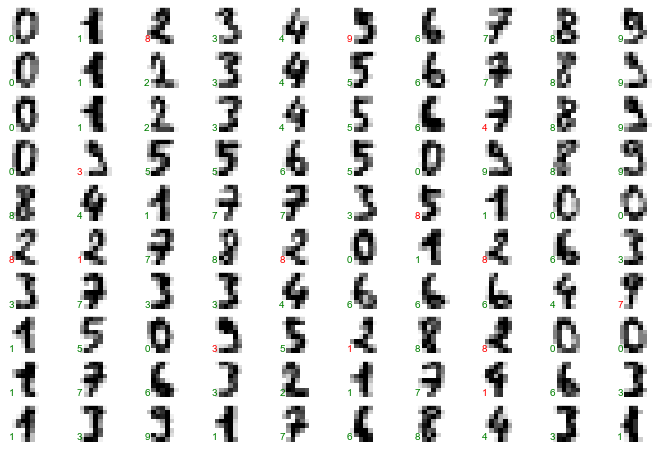

In [66]:
fig, axes = plt.subplots(10,10, subplot_kw = {'xticks': [], 'yticks':[]}, gridspec_kw = {'hspace' : .2, 'wspace' : .1}, figsize = (12, 8))
sample_predict = model.predict(digits.data[:100])
for ax, img, pred, label in zip(axes.flat, sample, sample_predict, sample_target):
    ax.imshow(img, interpolation = 'nearest', cmap = 'binary')
    ax.text(.05, .05, str(pred), transform = ax.transAxes, color = 'green' if pred == label else 'red')

Text(92.68, 0.5, 'true value')

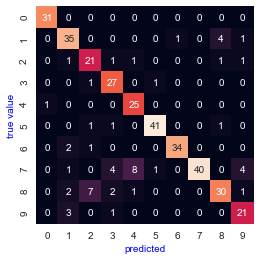

In [70]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(data = matrix, annot=True, cbar=False, square = True)
plt.xlabel('predicted', color = 'blue')
plt.ylabel('true value', color = 'blue')